<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/simple_conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Convolution Visualisation

A visualisation of how the weights change for a single 5x5 convolution grid that stays in the same place in an image; i.e. it doesn't actually move (convolve). 

The weights converge to roughly the shape of the input image.

# Imports

In [310]:
import numpy as np
import math
import time
from tensorflow import keras
from pathlib import Path
from os import path
from keras.preprocessing.image import load_img
import IPython.display as display

# Settings

In [334]:
# Try different sizes, e.g. 3 or 7.
CONV_SIZE=5
learning_rate=0.003
IMG_ROWS, IMG_COLS = CONV_SIZE, CONV_SIZE # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
model_name="SingleC2D"
model_plot_filename="C2D.png"
show_shapes=True

# Functions

In [312]:
def transform_weights(wts):
    main_list=[]
    for wtss in wts:
        #print(wtss)
        sub_list=[]
        for wtsss in wtss:
            #print("wtss", wtsss[0][0])
            sub_list.append(wtsss[0][0])
            
        main_list.append(sub_list)
    return np.asarray(main_list)

In [313]:
def create_model():
    sub_image = keras.layers.Input(shape=INPUT_SHAPE, name="image")
    c2d=keras.layers.Conv2D(1, (CONV_SIZE, CONV_SIZE), strides=math.ceil(CONV_SIZE/2), use_bias=False, name="C2D")(sub_image)
    model = keras.models.Model(inputs=sub_image, outputs=c2d, name=model_name)   
    return model

In [314]:
def animate(steps):
  if steps > 0:
      history = model.fit(inputs, outputs, epochs=1, verbose=False)
      loss = history.history['loss'][-1]
      out = model(inputs).numpy()[0][0][0][0]
      #if steps % 5 == 0 :
      #  print('[{:3d} {:5.2f} {:4.2f}]'.format(steps, loss, out), end=" ")
      wts = model.get_weights()
      wtsz = transform_weights(wts[0])
      #print(wtsz)
      plot[0].remove()      
      #surface = ax.plot_wireframe(x, y, wtsz, color='green')
      #surface = ax.plot_surface(x,y,wtsz, cmap='viridis', edgecolor='none')
      surface = get_plot_item(ax,x,y,wtsz)
      plot[0] = surface
      #fig.data[0].z=wtsz
  else:
      plot[0].remove()      
      surface = get_plot_item(ax,x,y,initial_wtsz)
      #surface = ax.plot_wireframe(x, y, initial_wtsz, color='green')
      #surface = ax.plot_surface(x,y,initial_wtsz, cmap='viridis', edgecolor='none')
      plot[0] = surface
  return (surface,)


In [315]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def display3dsubplots(z1, z2, title_text='Sub-image and Weights'):
  spfig = make_subplots(
      rows=1, cols=2,
      specs=[[{'type': 'surface'}, {'type': 'surface'}]])
  spfig.add_trace(
      go.Surface(z=z1,  showscale=False),
      row=1, col=1)
  spfig.add_trace(
      go.Surface(z=z2),
      row=1, col=2)
  spfig.update_layout(
      title_text=title_text,
      height=600,
      width=900)
  spf1 = go.FigureWidget(spfig)
  spf1.show()


In [316]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def get_plot_item(ax,x,y,z):
    #item = ax.plot_surface(x,y,z, cmap='viridis', edgecolor='none')
    #item = = ax.scatter3D(x, y, initial_wtsz, c=initial_wtsz, cmap='hsv');
    item = ax.plot_wireframe(x, y, z, color='green')
    return item 

def mat3dplot(angle1, angle2):
  x = np.outer(np.linspace(0, CONV_SIZE-1, CONV_SIZE), np.ones(CONV_SIZE))
  #print(x)
  y = x.copy().T
  fig = plt.figure(figsize=[12, 10])
  ax = plt.axes(projection='3d')
  ax.set_title('Weights')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  #surface = ax.plot_surface(x,y,initial_wtsz, cmap='viridis', edgecolor='none')
  #surface = ax.scatter3D(x, y, initial_wtsz, c=initial_wtsz, cmap='hsv');
  #surface = ax.plot_wireframe(x, y, initial_wtsz, color='green')
  surface = get_plot_item(ax,x,y,initial_wtsz)
  ax.view_init(angle1, angle2)
  plot = [surface]
  #print(surface)
  return fig, plot, ax, x, y


# Model

Model: "SingleC2D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 5, 5, 1)]         0         
_________________________________________________________________
C2D (Conv2D)                 (None, 1, 1, 1)           25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


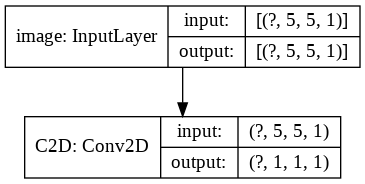

In [335]:
model=create_model()
model.summary()
keras.utils.plot_model(model, model_plot_filename, show_shapes=show_shapes) 

# Initial Weights

In [318]:
wts = model.get_weights()
wtsz = transform_weights(wts[0])
initial_wtsz=wtsz
print(wtsz)

[[-0.27400526 -0.04356143 -0.08469859 -0.13482034 -0.15600574]
 [-0.06578359  0.07889006  0.13552856 -0.01816612 -0.05846161]
 [-0.2218996  -0.25895312 -0.25623995 -0.32820198 -0.24563473]
 [-0.10243103 -0.13297957 -0.10442212  0.13092148 -0.21440375]
 [-0.336947    0.06254339  0.09944612 -0.1330743   0.01604009]]


# Image Data

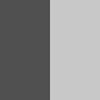

In [319]:
from keras.preprocessing.image import array_to_img
image_array1 = np.empty([3, 100, 50]) 
image_array1.fill(80) 
image_array2 = np.empty([3, 100, 50]) 
image_array2.fill(200) 
image_array = np.concatenate((image_array1, image_array2), axis=2)
#print(image_array)
img = array_to_img(image_array, data_format='channels_first', scale=False)
img=img.convert('L')
display.display(img)



##  Sub Image

Sub image and resized sub image displayed.

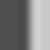

In [320]:
from keras.preprocessing.image import img_to_array
left = 50-math.ceil(CONV_SIZE/2)
top = 50
right = left+CONV_SIZE
bottom = top+CONV_SIZE
sub_image = img.crop((left, top, right, bottom)) 
#print(img_to_array(sub_image))
display.display(sub_image)
display.display(sub_image.resize((50,50)))

In [321]:
imageArray =np.asarray(sub_image)/255
print(imageArray)

[[0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]]


## Initial Weights - 3D Display 

In [322]:
display3dsubplots( imageArray, initial_wtsz, title_text='Sub-image and Initial Weights')

## Dataset

In [323]:
import tensorflow as tf
reference = CONV_SIZE*CONV_SIZE/2
batch_size = 500
X = tf.constant(np.array([imageArray]), dtype=tf.float32 )
Y = tf.constant(np.full((1,), reference), dtype=tf.float32 )
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 1 ).repeat( 1 ).batch( batch_size )
iterator = dataset.__iter__()
inputs , outputs = iterator.get_next()

In [324]:
print(inputs, outputs)

tf.Tensor(
[[[0.3137255  0.3137255  0.3137255  0.78431374 0.78431374]
  [0.3137255  0.3137255  0.3137255  0.78431374 0.78431374]
  [0.3137255  0.3137255  0.3137255  0.78431374 0.78431374]
  [0.3137255  0.3137255  0.3137255  0.78431374 0.78431374]
  [0.3137255  0.3137255  0.3137255  0.78431374 0.78431374]]], shape=(1, 5, 5), dtype=float32) tf.Tensor([12.5], shape=(1,), dtype=float32)


# Training

In [325]:
model.compile(keras.optimizers.SGD(learning_rate), loss='mse', run_eagerly=True)

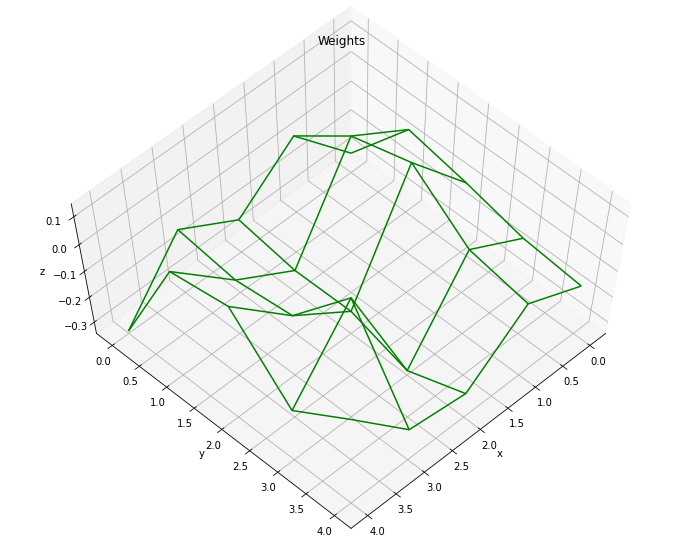

In [326]:
fig, plot, ax, x, y = mat3dplot(65, 45)

In [327]:
import matplotlib
from matplotlib import animation
matplotlib.rcParams['animation.embed_limit'] = 2**128
print("Target output is", reference)
print('Initial output {:4.2f}'.format(model(inputs).numpy()[0][0][0][0]))
anim = animation.FuncAnimation(fig, animate, interval=50, frames=100, blit=True)


Target output is 12.5
Initial output -1.37


## Weights Animation

In [328]:
from IPython.display import HTML
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [329]:
print('Final output {:4.2f}'.format(model(inputs).numpy()[0][0][0][0]))

Final output 12.37


In [330]:
print("Sub-image")
print(imageArray)
wts = model.get_weights()
wtsz = transform_weights(wts[0])
print("Final weights")
print(wtsz)
print("sum", np.sum(wtsz))
print("Initial weights")
print(initial_wtsz)
print("sum", np.sum(initial_wtsz))

Sub-image
[[0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]
 [0.31372549 0.31372549 0.31372549 0.78431373 0.78431373]]
Final weights
[[0.29084608 0.5212899  0.48015273 1.2773076  1.2561224 ]
 [0.49906772 0.64374125 0.7003798  1.3939619  1.3536664 ]
 [0.34295171 0.3058982  0.30861136 1.0839266  1.1664935 ]
 [0.46242028 0.43187174 0.4604292  1.5430495  1.1977245 ]
 [0.22790438 0.6273947  0.6642973  1.2790537  1.428168  ]]
sum 19.94673
Initial weights
[[-0.27400526 -0.04356143 -0.08469859 -0.13482034 -0.15600574]
 [-0.06578359  0.07889006  0.13552856 -0.01816612 -0.05846161]
 [-0.2218996  -0.25895312 -0.25623995 -0.32820198 -0.24563473]
 [-0.10243103 -0.13297957 -0.10442212  0.13092148 -0.21440375]
 [-0.336947    0.06254339  0.09944612 -0.1330743   0.01604009]]
sum -2.64732


## Final Weights - 3D Display 

In [331]:
display3dsubplots( imageArray, wtsz, title_text='Sub image and final Weights')